In [0]:
!pip install scikit-plot==0.3.7

In [0]:
from diagnostics import Diagnostics

In [3]:
from keras.datasets import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

from keras import backend as K

In [0]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy', auc])

In [0]:
# hyperparameters
batch_size = 30
num_epochs = 5
validation_split = 0.2

In [11]:
history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size, 
                    epochs=num_epochs, 
                    validation_split=validation_split, 
                    verbose=2)

W0817 20:47:18.512969 140591837243264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4000 samples, validate on 1000 samples
Epoch 1/5
 - 3s - loss: 1.8538 - acc: 0.5138 - auc: 0.7189 - val_loss: 1.1658 - val_acc: 0.7410 - val_auc: 0.8626
Epoch 2/5
 - 1s - loss: 0.8204 - acc: 0.7880 - auc: 0.9039 - val_loss: 0.5839 - val_acc: 0.8420 - val_auc: 0.9302
Epoch 3/5
 - 1s - loss: 0.5351 - acc: 0.8507 - auc: 0.9436 - val_loss: 0.4344 - val_acc: 0.8820 - val_auc: 0.9533
Epoch 4/5
 - 1s - loss: 0.4405 - acc: 0.8745 - auc: 0.9596 - val_loss: 0.4204 - val_acc: 0.8700 - val_auc: 0.9646
Epoch 5/5
 - 1s - loss: 0.3795 - acc: 0.8925 - auc: 0.9682 - val_loss: 0.3669 - val_acc: 0.8960 - val_auc: 0.9713


In [12]:
loss_train, acc_train, auc_train  = model.evaluate(x_train[:5000], y_train[:5000], verbose=False)
loss_test, acc_test, auc_test  = model.evaluate(x_test[:5000], y_test[:5000], verbose=False)
print(f'Train acc/loss: {acc_train:.3}, {loss_train:.3}')
print(f'Test acc/loss: {acc_test:.3}, {loss_test:.3}')

Train acc/loss: 0.907, 0.324
Test acc/loss: 0.864, 0.454


In [13]:
y_pred_train = model.predict(x_train[:5000], verbose=True)
y_pred_test = model.predict(x_test[:5000], verbose=True)

5000/5000 [==============================] - 0s 38us/step


In [0]:
loss_epoch = history.history['loss']
loss_epoch_val = history.history['val_loss']

acc_epoch = history.history['acc']
acc_epoch_val = history.history['val_acc']

auc_epoch = history.history['auc']
auc_epoch_val = history.history['auc']

In [15]:
#def __init__(self, actual, predicted, acc, loss, auc, pixel_values, feature_list, cross_val):
print(y_test[:1])
print(y_pred_test)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[1.9183205e-04 6.3140098e-05 1.7320766e-04 ... 9.9027342e-01
  1.4917598e-04 4.4219862e-03]
 [1.7832885e-02 9.3657186e-04 8.6250073e-01 ... 2.3134281e-07
  1.9423481e-02 4.1703092e-06]
 [3.8616790e-04 9.5443177e-01 1.0664356e-02 ... 1.0192438e-02
  4.8523759e-03 2.3183879e-03]
 ...
 [1.0137878e-01 1.4725033e-02 6.6301578e-01 ... 4.5968318e-06
  6.8508565e-02 2.2907176e-05]
 [1.4534690e-04 6.6503391e-02 8.0462283e-04 ... 4.4785865e-02
  9.3761701e-03 2.0498094e-01]
 [9.9757630e-01 3.8919513e-08 9.1180886e-04 ... 2.5436358e-07
  1.1848962e-04 3.3948197e-07]]


In [0]:
def convert_to_index(array_categorical):
    import numpy as np
    array_index = [np.argmax(array_temp) for array_temp in array_categorical]
    return array_index

In [0]:
plots = Diagnostics(y_test[:5000], y_pred_test, [acc_epoch, acc_epoch_val], [loss_epoch, loss_epoch_val], 
            [auc_epoch, auc_epoch_val], 0, 0, 0)

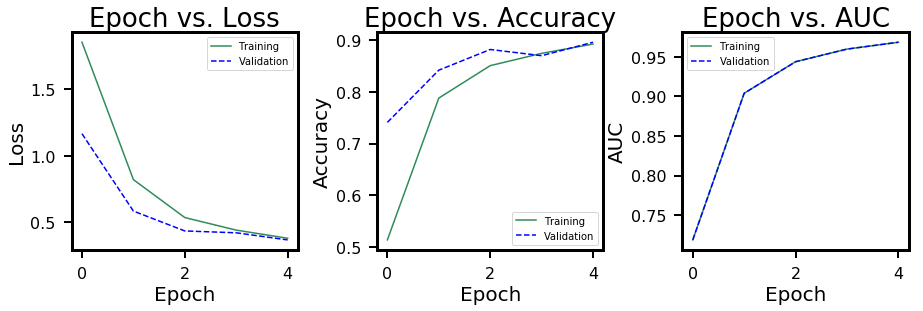

In [19]:
plots.plot_metrics_per_epoch(figsize = (15, 4), name_plot=[0, 1, 2])

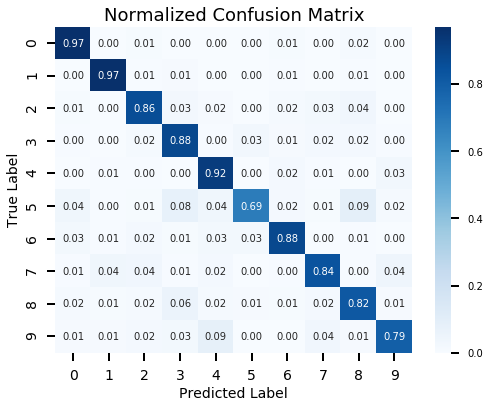

In [20]:
plots.plot_cm(figsize=(8, 6))

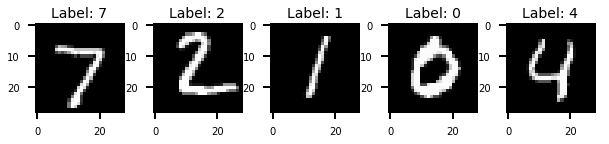

In [21]:
import numpy as np
y_pred_test = [np.argmax(array_temp) for array_temp in y_pred_test]
plots.plot_sample_img(x_test[:5], y_pred_test[:5], figsize=(10, 5), filename="Image_Sample.png", show=True)

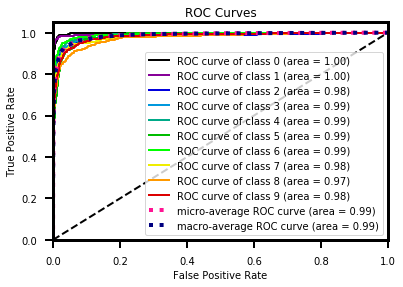

In [22]:
plots.ROC_plot_sk()

In [23]:
plots.output_average_precision()

Average precision-recall score: 0.93


In [0]:
# cannot create precision recall bc its not a binary classification problem
# plots.precision_recall_plot()